# Manufacturing cost prediction analysis
### Relationship between manufacturing cost and number of units
- Objective: Predict the cost vs. the number of units sold using ML Ensemble Methods

1. [Imports](#imports)
2. [EDA](#eda)
3. [Data Split & Analysis Utils](#datasplit)
4. [AdaBoost](#adaboost)
5. [GradientBoosting](#gradboost)
6. [Stacking](#stack)



#### 1. Imports <a id='imports'></a>

In [116]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data profiling
from ydata_profiling import ProfileReport

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold

# Model evaluation
from sklearn.metrics import f1_score, mean_squared_error

# Regressors and ensemble methods
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
    StackingRegressor
)
from sklearn.neural_network import MLPRegressor

# Classifiers (in case they are needed elsewhere)
from sklearn.tree import DecisionTreeClassifier

In [117]:
manufacturing_df = pd.read_csv('EconomiesOfScale.csv')

#### 2. EDA <a id='eda'></a> 

In [118]:
manufacturing_df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [119]:
manufacturing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Units,1000.0,4.472799,1.336241,1.0,3.594214,4.435958,5.324780,10.0
Manufacturing Cost,1000.0,40.052999,10.595322,20.0,32.912036,38.345781,44.531822,100.0


In [120]:
profile_report = ProfileReport(manufacturing_df, title="Profiling Report")

In [121]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 3. Data Split & Analysis Utils <a id='datasplit'></a>

In [122]:
X = manufacturing_df.drop(['Manufacturing Cost'], axis=1)
y = manufacturing_df['Manufacturing Cost']

In [123]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [124]:
def return_mean_squared_error(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = cv)
    return -n_scores

In [125]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_mean_squared_error(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

#### 4. AdaBoost <a id='adaboost'></a>

##### - Explore the effect of increasing the depth of the DecisionTreeClassifier weak learner on the AdaBoost ensemble.

>1 58.853 (11.602)
>2 39.188 (8.689)
>3 37.875 (8.465)
>4 37.686 (8.242)
>5 39.463 (9.805)
>6 42.304 (11.103)


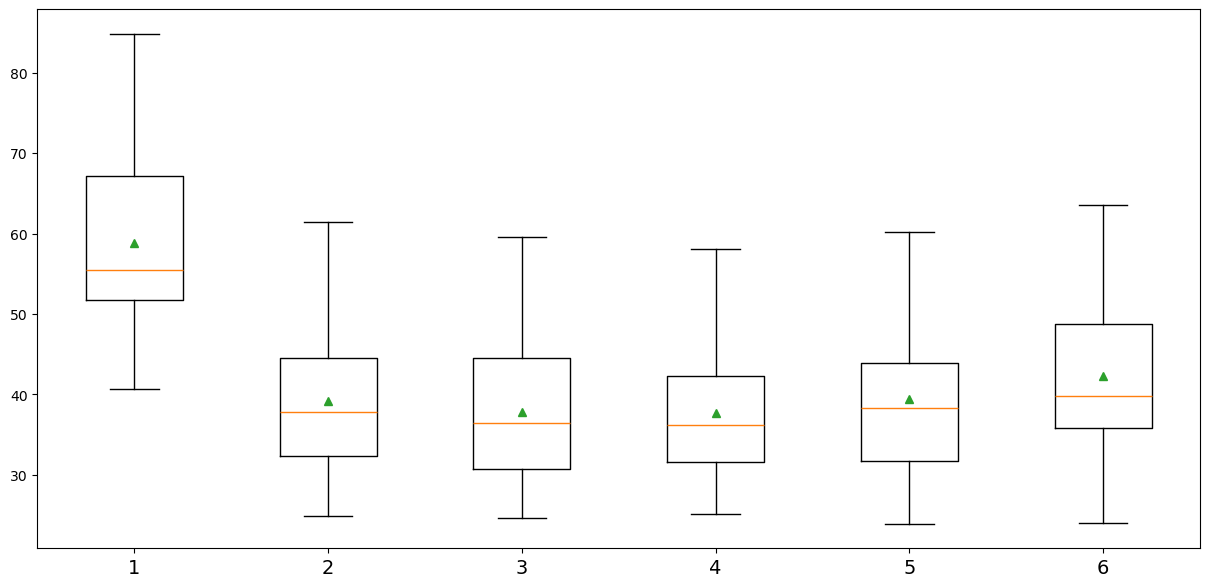

In [126]:
# Define function to create models
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=value), random_state=15)
    return models

# Create and evaluate models
models = get_models([1, 2, 3, 4, 5, 6])
return_results(models)

##### - Compare the results of your models when you define different values for the number of estimators.

>1 73.242 (19.717)
>2 48.187 (12.356)
>3 37.085 (7.698)
>4 36.556 (9.248)
>5 37.812 (9.348)
>6 39.466 (10.076)


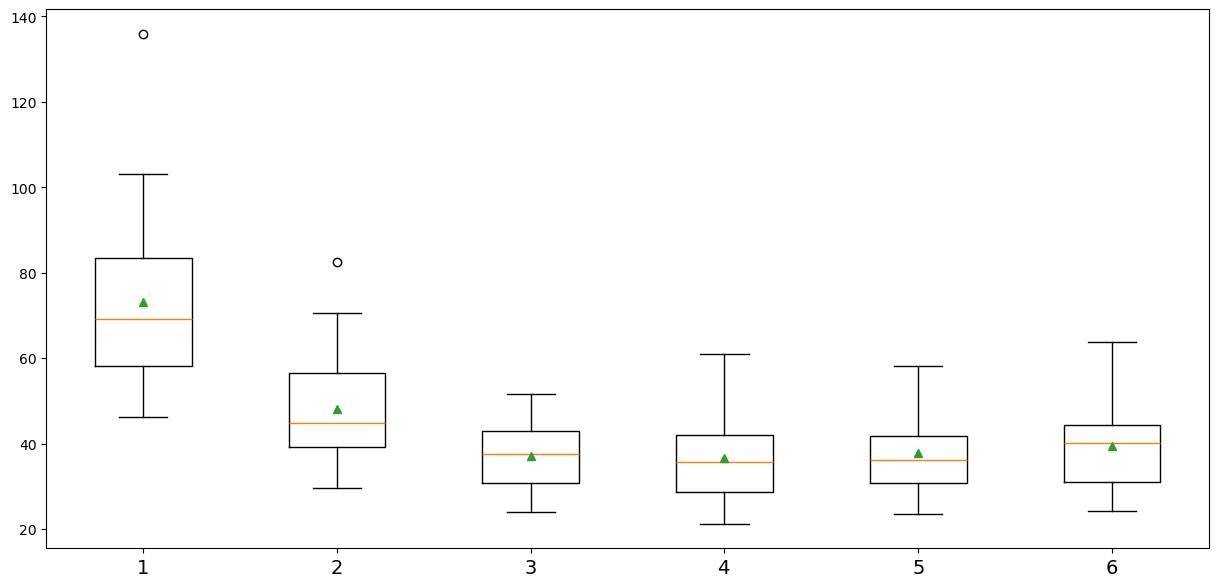

In [127]:
# Define function to create models
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=value), n_estimators=value, random_state=15)
    return models

# Create and evaluate models
models = get_models([1, 2, 3, 4, 5, 6])
return_results(models)

##### - Compare the results of your models when you define different values for the learning rate.

>0.1 36.107 (8.170)
>0.2 36.939 (8.456)
>0.3 37.288 (8.865)
>0.4 37.817 (8.832)
>0.5 37.714 (8.741)
>0.6 37.703 (8.841)
>0.7 37.506 (8.768)
>0.8 37.511 (8.674)
>0.9 37.952 (8.791)
>1.0 37.875 (8.465)


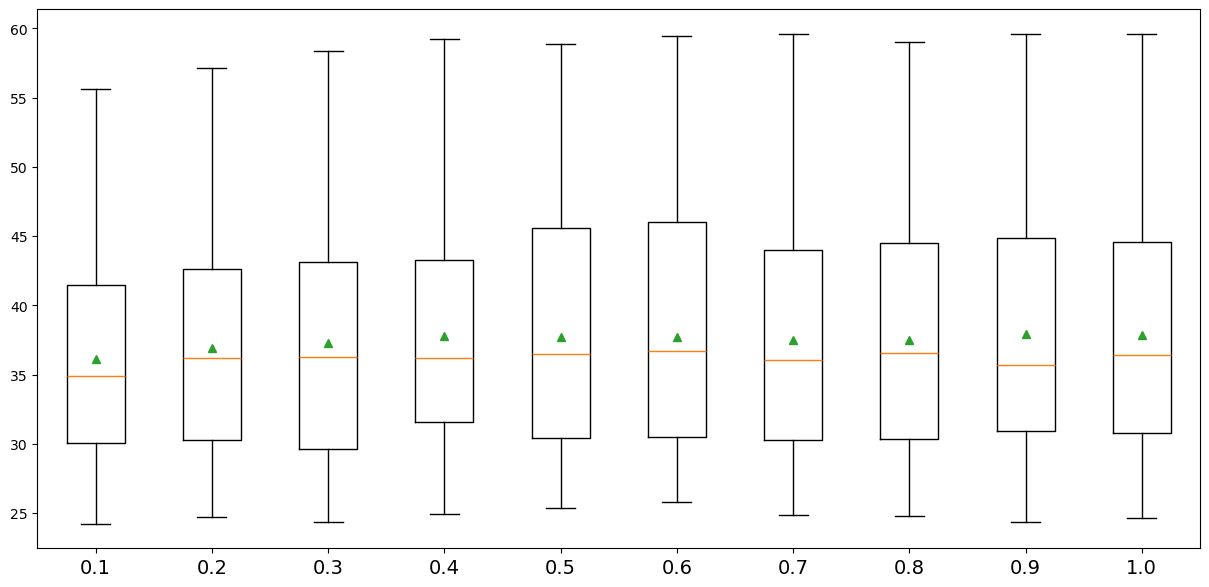

In [128]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostRegressor(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

#### 5. GradientBoosting <a id='gradboost'></a>

##### - Compare the results when defining learning rate in the values [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0]

>0.001 98.126 (27.255)
>0.01 44.827 (11.535)
>0.1 37.977 (9.276)
>0.3 43.573 (10.868)
>0.5 49.040 (12.223)
>0.8 57.220 (14.633)
>1.0 63.461 (15.819)


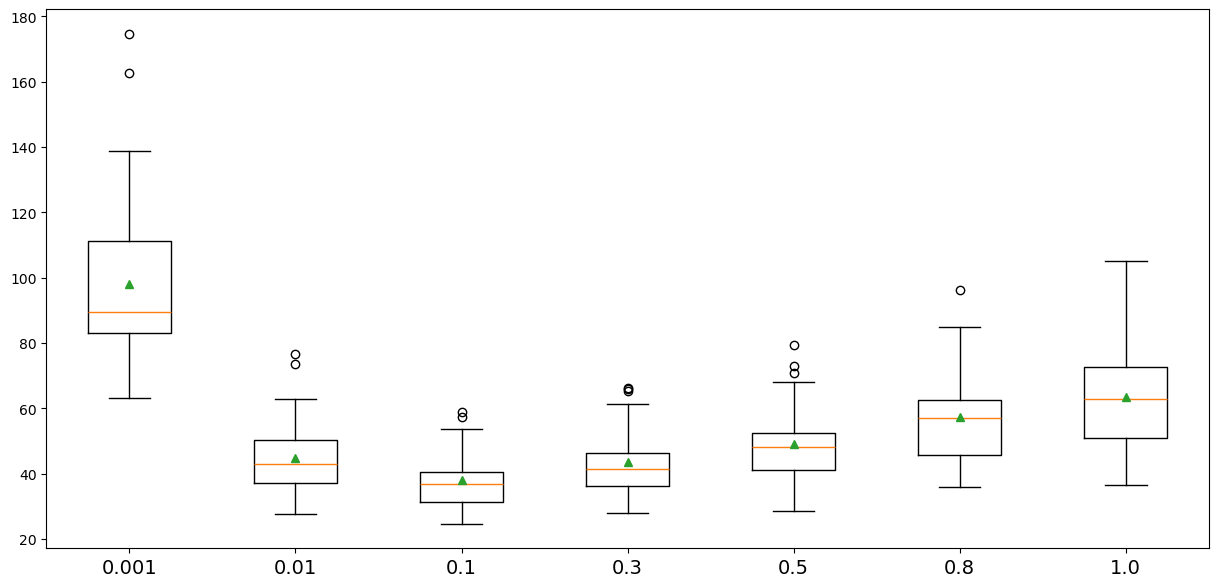

In [129]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingRegressor(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

##### - Compare the results when defining learning rate in the values [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0] when the number of trees is 500 (by default is 100).

>0.001 62.943 (17.151)
>0.01 36.285 (8.839)
>0.1 46.784 (11.690)
>0.3 58.545 (14.455)
>0.5 64.316 (15.124)
>0.8 67.488 (15.400)
>1.0 67.819 (15.431)


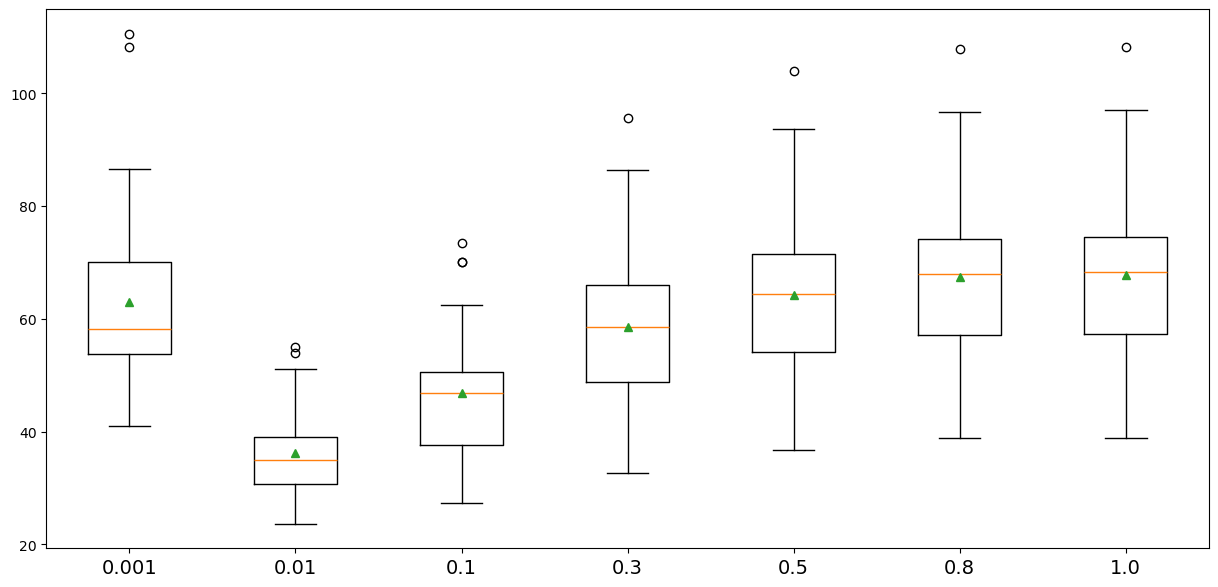

In [130]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingRegressor(learning_rate = value, random_state = 15, n_estimators = 500)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

##### - Check the effect of changing the number of trees with values between 2 to 200 ([2,5,10,20,30,50,100,150,200]).

>2 85.395 (23.664)
>5 61.520 (16.805)
>10 43.878 (11.237)
>20 36.246 (8.712)
>30 35.849 (8.377)
>50 36.518 (8.964)
>100 37.977 (9.276)
>150 39.645 (9.532)
>200 40.868 (9.844)
>500 46.784 (11.690)


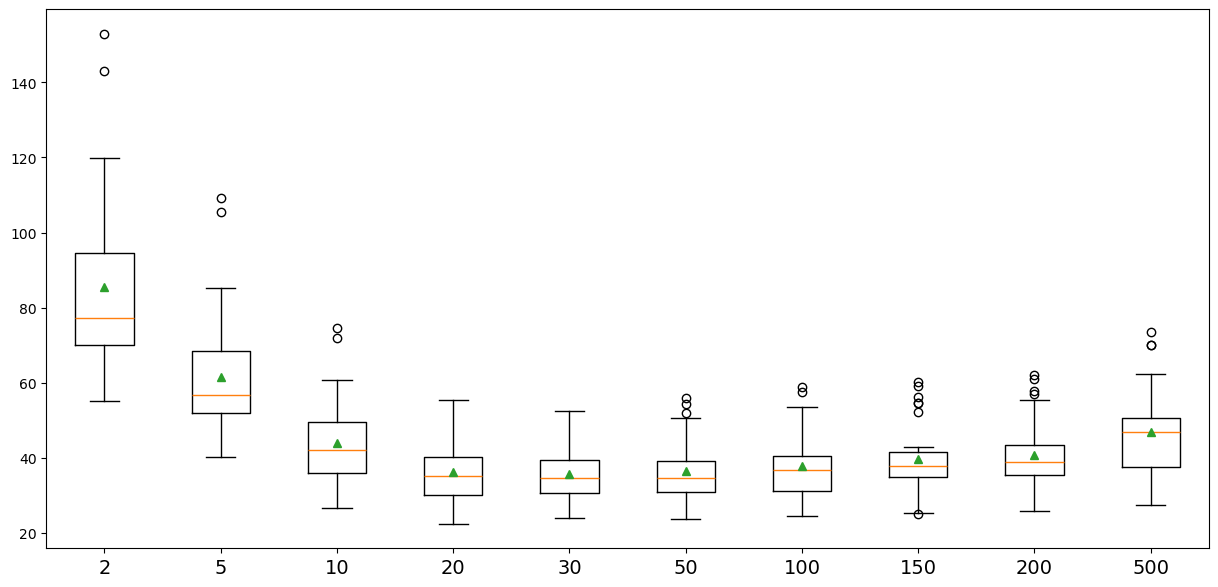

In [131]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingRegressor(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200,500])
return_results(models)

##### - Check the effect of changing the number of samples used in each tree.

>0.2 38.223 (8.694)
>0.4 38.870 (8.933)
>0.6 38.801 (9.068)
>0.8 38.195 (9.344)
>1.0 37.977 (9.276)


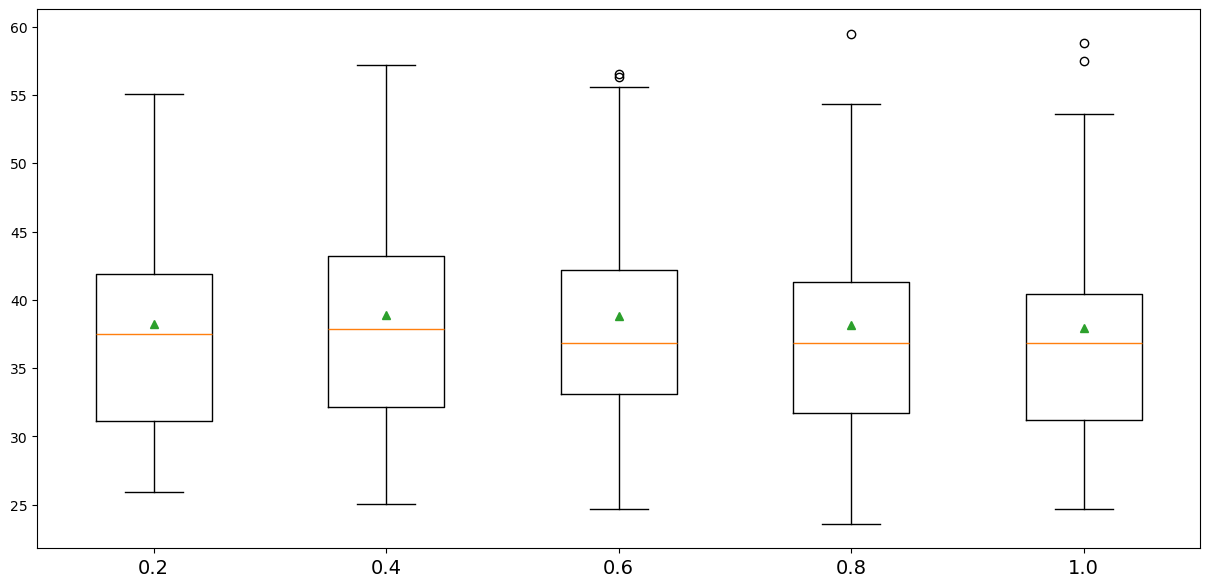

In [132]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingRegressor(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

#### 6. Stacking <a id='stack'></a>

In [133]:
# Split the data now using a train test split since we're using Stacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Scale the data because now we're combining different algorithms in the ensemble
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
lr = LinearRegression().fit(X_train, y_train)
kn = KNeighborsRegressor().fit(X_train, y_train)
dt = DecisionTreeRegressor(max_depth = 3, random_state = 10).fit(X_train, y_train)
nn = MLPRegressor(max_iter = 5000, random_state = 10).fit(X_train, y_train)
bg = BaggingRegressor(random_state = 10).fit(X_train, y_train)
ab = AdaBoostRegressor(random_state = 10).fit(X_train, y_train)
rf = RandomForestRegressor(random_state = 10).fit(X_train, y_train)
gb = GradientBoostingRegressor(random_state = 10).fit(X_train, y_train)

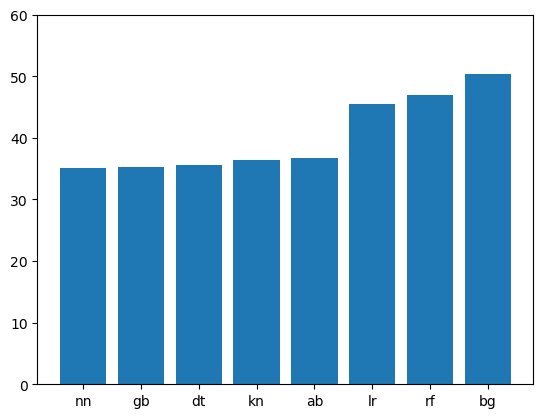

In [135]:
mean_squared_errors = [mean_squared_error(y_test, lr.predict(X_test)), 
              mean_squared_error(y_test, kn.predict(X_test)), 
              mean_squared_error(y_test, dt.predict(X_test)),
              mean_squared_error(y_test, nn.predict(X_test)), 
              mean_squared_error(y_test, bg.predict(X_test)), 
              mean_squared_error(y_test, ab.predict(X_test)),
              mean_squared_error(y_test, rf.predict(X_test)), 
              mean_squared_error(y_test, gb.predict(X_test))]
models = ['lr', 'kn','dt','nn','bg','ab','rf','gb']
data_tuples = list(zip(models,mean_squared_errors))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0,60)
plt.show()

In [136]:
base_learners = [
    ('lr', LinearRegression()),
    ('kn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor(max_depth=3, random_state=10)),
    ('nn', MLPRegressor(max_iter=5000, random_state=10)),
    ('bg', BaggingRegressor(random_state=10)),
    ('ab', AdaBoostRegressor(random_state=10)),
    ('rf', RandomForestRegressor(random_state=10)),
    ('gb', GradientBoostingRegressor(random_state=10))
]

In [137]:
# Define the meta-learner
meta_learner = LinearRegression()

# Build the stacking regressor
st = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking model
st.fit(X_train, y_train)

# Make predictions
y_pred = st.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Stacking Model Mean Squared Error: {:.3f}".format(mse))

/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Model Mean Squared Error: 33.851


##### - Combine the 3 best perform models 

In [140]:
best_estimators = [
    ('nn', MLPRegressor(max_iter=5000, random_state=10)),
    ('dt', DecisionTreeRegressor(max_depth=3, random_state=10)),
    ('gb', GradientBoostingRegressor(random_state=10))
]

st3 = StackingRegressor(estimators=best_estimators, final_estimator=LinearRegression()).fit(X_train, y_train)

/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelgoncalves/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


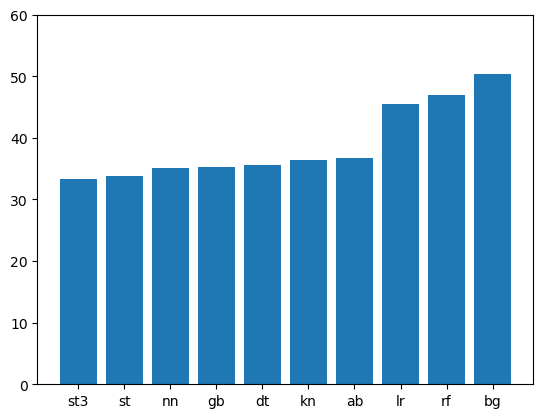

In [141]:
mean_squared_errors_all = [mean_squared_error(y_test, lr.predict(X_test)), 
              mean_squared_error(y_test, kn.predict(X_test)), 
              mean_squared_error(y_test, dt.predict(X_test)),
              mean_squared_error(y_test, nn.predict(X_test)), 
              mean_squared_error(y_test, bg.predict(X_test)), 
              mean_squared_error(y_test, ab.predict(X_test)),
              mean_squared_error(y_test, rf.predict(X_test)), 
              mean_squared_error(y_test, gb.predict(X_test)),
              mean_squared_error(y_test, st.predict(X_test)),
              mean_squared_error(y_test, st3.predict(X_test))]
models_all = ['lr', 'kn','dt','nn','bg','ab','rf','gb', 'st', 'st3']
data_tuples = list(zip(models_all,mean_squared_errors_all))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0,60)
plt.show()

In [143]:
print("Top 3 Stacking Model Mean Squared Error: {:.3f}".format(mean_squared_error(y_test, st3.predict(X_test))))

Top 3 Stacking Model Mean Squared Error: 33.340


- The stacking model using the 3 best performing algorithms performed the best, with the lowest MSE of 33.340